# <a id='index'>Index</a>

+ <a href='#Nim'>1. Nim Game</a>
    + <a href='#1.1'>1.1 Introduction</a>
    + <a href='#1.2'>1.2 Strategy (when winning move possible)</a>
    + <a href='#1.3'>1.3 Strategy (when winning move not possible)</a>
+ <a href='#QNim'>2. QNim</a>
    + <a href='#2.1'>2.1 Introduction</a>
    + <a href='#2.2'>2.2 Importing libraries</a>
    + <a href='#2.3'>2.3 Circuit description</a>
    + <a href='#2.4'>2.4 Preprocessing</a>
    + <a href='#2.5'>2.5 Quantum Operations</a>
    + <a href='#2.6'>2.6 Measurement and Postprocessing</a>
+ <a href='#benchmarking'>3. Benchmarking</a>

# <a id='Nim'>1. Nim Game</a>
<a href='#index'>Go back to the top</a>

## <a id='1.1'>1.1 Introduction</a>
<a href='#index'>Go back to the top</a>

[Nim](https://en.wikipedia.org/wiki/Nim) is a mathematical game of strategy in which two players take turns removing (or "nimming") objects from distinct heaps or piles. On each turn, a player must remove at least one object, and may remove any number of objects provided they all come from the same heap or pile. Depending on the version being played, the goal of the game is either to avoid taking the last object or to take the last object.

<!-- <div> -->
<!-- <img src="attachment:nim.png" width="500"/> -->
<!-- </div> -->
<img src="nim.png" alt="Nim Game" style="width: 200px;"/>

For this project, we will be implementing Nim misère play in which the goal is to ensure that the opponent is forced to take the last remaining object.

## <a id='1.2'>1.2 Strategy (when winning move possible)</a>
<a href='#index'>Go back to the top</a>

Consider th fllowing scenerio of Nim game.

| Heap Number | Number of objects |
| --- | --- |
| 1 | 1 |
| 2 | 3 |
| 3 | 4 |
| 4 | 7 |

Let $heap$ denote the array where $heap_i$ denote number of objects present in $i_{th}$ heap. For th above example

$$heap = [1,3,4,7]$$

To find how many objects to remove from which heap, we perform the following steps:

+ Step 1 - Calculate nim sum
    $$ nim\_sum = heap_1 \oplus heap_2 \oplus .... \oplus heap_n $$

    where $\oplus$ is a logical XOR operation. For the example above, $nim\_sum = 1$. 
    

+ Step 2 - Perform XOR between $nim\_sum$ and $heap$ which results in a new array $xor\_heap$

    $$ xor\_heap_i = heap_i \oplus nim\_sum $$
    
    For the above example $xor\_heap = [1\oplus1,3\oplus1,4\oplus1,7\oplus1] = [0,2,5,6]$
    
    
+ Step 3 - Compare $heap$ and $xor\_heap$. The idea is to leave board state with $nim\_sum=0$ for our opponent. If $ xor\_heap_i < heap_i $ then it is possible to remove $(heap_i-xor\_heap_i)$ objects from $heap_i$. For the example above, $heap_1, heap_2$ and $heap_4$ are reduced from 1,3,7 to 0,2,6 respectiely in $xor\_heap$. Therefore, there are three possible moves we can make against opponent for the given example, which are:

    $$ [1,3,4,7] \longrightarrow \{[0,3,4,7],[1,2,4,7],[1,3,4,6]\} $$

    It can be observed that $nim\_sum$ for all {[0,3,4,7],[1,2,4,7],[1,3,4,6]} is 0.


+ <font color='red'> $Misère$ step </font>: Instead of going to step3, this step is performed for specific board states satisying th following conditions:

    $$ heap_j > 1, \text{ for any one } j \in [1,n]$$
    $$ heap_i = 1 \text{ or } 0, \forall i \in [1,n] \text{ and } i \neq j$$

    In this case, remove objects from $heap_j$ so that opponent is left with odd number of heaps with one object left in them. For example, $[0,0,3,0] \longrightarrow [0,0,1,0]$, $[1,1,2,0] \longrightarrow [1,1,1,0]$ and $[1,1,4,1] \longrightarrow [1,1,0,1]$.

## <a id='1.3'>1.3 Strategy (when winning move not possible)</a>
<a href='#index'>Go back to the top</a>

Consider the following case where our opponent leaves us with a board with $nim\_sum=0$

| Heap Number | Number of objects |
| --- | --- |
| 1 | 1 |
| 2 | 3 |
| 3 | 5 |
| 4 | 7 |

Since, $nim\_sum = 0$ already, $heap = xor\_heap$, as a result no heaps can be reduced by the logic mentioned above. One of the logical step is to leave our opponent with maximum number of objects on te board, i.e pick up  object from any one of the pile.

$$ [1,3,5,7] \longrightarrow \{[0,3,5,7],[1,2,5,7],[1,3,4,7],[1,3,5,6]\} $$

In [5]:
def misere_step(ones,piles):
    # even number of piles of 1 eg (1,1,3,0) or (0,0,3,0)
    if ones%2 == 0:
        objects_to_remove = []
        removable_amount = 1
        for i in range(len(piles)):
            if piles[i] > 1:
                objects_to_remove.append(piles[i]-1)
            else:
                objects_to_remove.append(0)
    # odd number of piles of 1 eg (1,1,3,1)
    else:
        objects_to_remove = []
        removable_amount = 1
        for i in range(len(piles)):
            if piles[i] > 1:
                objects_to_remove.append(piles[i])
            else:
                objects_to_remove.append(0)
    return objects_to_remove, removable_amount

def get_piles_to_remove(piles):
    nim_sum = 0
    for p in piles:
        nim_sum = nim_sum ^ p
    objects_to_remove = []
    removable_amount = 0
    for p in piles:
        new_p = p^nim_sum
        if new_p < p:
            objects_to_remove.append(p-new_p)
            removable_amount = removable_amount + 1
        else:
            objects_to_remove.append(0)
    return objects_to_remove, removable_amount


In [6]:
piles = [1,3,5,7]
ones = piles.count(1)
zeros = piles.count(0)
non_zeros = 4 - (ones+zeros)

# all zeros except one eg (0,0,0,7) OR some zeros some ones some non_zeros
# leave odd piles of 1s
if non_zeros == 1: 
    removable_pile, removable_count = misere_step(ones, piles) 
else:
    removable_pile, removable_count = get_piles_to_remove(piles)
    
print(piles,"No winnable move:",removable_pile, removable_count)


piles = [1,3,4,7]
ones = piles.count(1)
zeros = piles.count(0)
non_zeros = 4 - (ones+zeros)

# all zeros except one eg (0,0,0,7) OR some zeros some ones some non_zeros
# leave odd piles of 1s
if non_zeros == 1: 
    removable_pile, removable_count = misere_step(ones, piles) 
else:
    removable_pile, removable_count = get_piles_to_remove(piles)
    
print(piles,"Winnable move:",removable_pile, removable_count)

piles = [1,3,1,0]
ones = piles.count(1)
zeros = piles.count(0)
non_zeros = 4 - (ones+zeros)

# all zeros except one eg (0,0,0,7) OR some zeros some ones some non_zeros
# leave odd piles of 1s
if non_zeros == 1: 
    removable_pile, removable_count = misere_step(ones, piles) 
else:
    removable_pile, removable_count = get_piles_to_remove(piles)
    
print(piles,"Misere step:",removable_pile, removable_count)





[1, 3, 5, 7] No winnable move: [0, 0, 0, 0] 0
[1, 3, 4, 7] Winnable move: [1, 1, 0, 1] 3
[1, 3, 1, 0] Misere step: [0, 2, 0, 0] 1


# <a id='QNim'>2. QNim</a>
<a href='#index'>Go back to the top</a>

## <a id='2.1'>2.1 Introduction</a>
<a href='#index'>Go back to the top</a>

+ <font color='blue'>Goal of this project is to create a Quantum version of Nim misere game where a human can play against quantum computer similar to Nimatron, which was first exhibited in 1940 at the New York World's Fair.</font>
+ <font color='blue'>UI will include 4 configurable heaps, with maximum of 7 objects possible in each heap.</font>

![alt text](Nimatron.png "Nimatron")

+ Quantum version of Nim game is implemented using dynamic circuit. Reducible heaps and the amount to be reduced is calculated using classical strategy shown above.
+ Superposition is created in case multiple moves are possible, and th result of measurement of superposition dictates the move quantum computer's move.
+ Superposition is created by applying hadamard gates, but the amplitude of the relevant moves is amplified using Grover's diffuion algorithm. 

+ <font color='red'>Dynamic circuit is used because of their shorter depth. Static circuit would become very large and measurement results would be vastly skewed due to noise contributed becasue of large depth and large number of qubits.</font>
+ <font color='red'>Although it is one of the stretch goal of this project to create a static circuit</font>


## <a id='2.2'>2.2 Importing libraries</a>
<a href='#index'>Go back to the top</a>

In [7]:
import numpy as np
from qiskit import BasicAer, QuantumCircuit, QuantumRegister, ClassicalRegister, execute
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
provider = IBMQ.load_account()
from collections import OrderedDict
from operator import itemgetter

provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='fall-22-29')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_guadalupe') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-29')>,
 <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q-community', group='qamp', project='fall-22-2

## <a id='2.3'>2.3 Circuit description</a>
<a href='#index'>Go back to the top</a>

+ Quantum registers:
    + 3 bit address register to store the address of heaps
        $$ heap_1 \longrightarrow |{001} \rangle$$
        $$ heap_2 \longrightarrow |{010} \rangle$$
        $$ heap_3 \longrightarrow |{011} \rangle$$
        $$ heap_4 \longrightarrow |{100} \rangle$$

    + 3 bit register to store the amount of objects to remove from heaps
    + 1 bit flag register used for diffusion operation performd on address register
    
    
+ Classical registers:
    + 3 bit register to measure address bits
    + 3 bit register to measure amount of objects to remove from measured heap address

In [8]:
objects_to_remove = QuantumRegister(3,'piles')
address = QuantumRegister(3,'address')
flag = QuantumRegister(1,'flag')
pick_objects = ClassicalRegister(3,'remove_object_amount')
pick_pile = ClassicalRegister(3,'pick_pile')
qc = QuantumCircuit(objects_to_remove,address,flag,pick_objects,pick_pile)

## <a id='2.4'>2.4 Preprocessing</a>
<a href='#index'>Go back to the top</a>

+ Preprocessing is performed on removable_pile, removable_count which are calculated above
+ removable_count is an integer which represents how many heaps are reducible
+ removable_pile is an array which represents how many objects to remove reducible heaps
+ When there are no winnable moves possible i.e QC gets a board from opponent with $nim\_sum=0$, $removable\_count=0$ and $removable\_pile=[0,0,0,0]$, there are 4 possible moves so we have to modify removable_count and removable_pile as they are later used in computation

For the purpose of simplicity, when removable_count=0 (i.e no winnable move) or removable_count=4 (i.e there are 4 winnable moves possible), we ignore the index which picks minimum objects from the board, since goal is to leave maximum objects for opponent to confuse them.

So we modify removable_amount, removable_pile accordigly as follows:

In [9]:
piles = [1,3,5,7]
ones = piles.count(1)
zeros = piles.count(0)
non_zeros = 4 - (ones+zeros)

# all zeros except one eg (0,0,0,7) OR some zeros some ones some non_zeros
# leave odd piles of 1s
if non_zeros == 1: 
    removable_pile, removable_count = misere_step(ones, piles) 
else:
    removable_pile, removable_count = get_piles_to_remove(piles)
    
print(piles,"\nNo winnable move:",removable_pile, removable_count)

if removable_count == 0:
    for i in range(len(removable_pile)):
        removable_pile[i] = 1
    removable_count = 4

if removable_count == 4:
    removable_pile[removable_pile.index(min(removable_pile))] = 0
    removable_count = removable_count - 1
    
print("After preprocessing:",removable_pile, removable_count)

[1, 3, 5, 7] 
No winnable move: [0, 0, 0, 0] 0
After preprocessing: [0, 1, 1, 1] 3


## <a id='2.5'>2.5 Quantum Operations</a>
<a href='#index'>Go back to the top</a>

+ If $removable\_count = 1$, $|address\rangle$ is changed to $i+1$ for which $removable\_pile[i]>0$ (0 based indexing) and corresponding $removable\_pile[i]$ is added to $|objects\_to\_remove \rangle$ register using QFT adder
    + Eg, for $heap=[1,3,4,5]$, $removable\_count = 1$ and $removable\_pile=[0,3,0,0]$
    
        $$address=|000\rangle \longrightarrow |010\rangle$$
        $$objects\_to\_remove=|000\rangle \longrightarrow |011\rangle$$
        
+ else:
    + address register is placed in superposition:
        
        $$ address = |000\rangle \longrightarrow \frac{1}{\sqrt{8}}(|001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle)$$
        
    + flag is converted to $|-\rangle$ state
    
    + Therefore, current register states is as follows:
    
        $$ |address,flag, objects\_to\_remove\rangle = \frac{1}{\sqrt{8}}(|000\rangle + |001\rangle + |010\rangle + |011\rangle + |100\rangle + |101\rangle + |110\rangle + |111\rangle)|-\rangle |000\rangle $$
    + $nim\_oracle$ marks the relevant address states using $removable\_pile$. Eg, for $heap = [1,3,4,7]$, $removable\_count = 3$ and $removable\_pile=[1,1,0,1]$, i.e states represented 1,2,4 are marked, leading to the following state:
    
        $$ |address,flag,objects\_to\_remove\rangle = \frac{1}{\sqrt{8}}(|000\rangle \color{red}{- |001\rangle - |010\rangle} + |011\rangle \color{red}{- |100\rangle} + |101\rangle + |110\rangle + |111\rangle)|-\rangle |000\rangle $$  
        
    + Diffusion operation is performed on address register to amplify the amplitudes of the marked states, resulting in the following state:
    
        $$ |address,flag,objects\_to\_remove\rangle = (a|000\rangle \color{red}{- b|001\rangle - c|010\rangle} + d|011\rangle \color{red}{- e|100\rangle} + f|101\rangle + g|110\rangle + h|111\rangle)|-\rangle |000\rangle $$  
        where $b,c,e \gt\gt a,d,f,g,h$
    + $removable\_pile[i]$ is added to $objects\_to\_remove$ register using QFT adder, controlled by $address$ register. Using the above example, the state of $address$ and $objects\_to\_remove$ is now converted to:
    
        $$ |address,objects\_to\_remove\rangle = (a|000\rangle|000\rangle \color{red}{- b|001}\rangle\color{blue}{|001\rangle} \color{red}{- c|010\rangle}\color{blue}{|001\rangle} + d|011\rangle|000\rangle \color{red}{- e|100\rangle}\color{blue}{|001\rangle} + f|101\rangle|000\rangle + g|110\rangle|000\rangle + h|111\rangle|000\rangle) $$  
    
    where $b,c,e \gt\gt a,d,f,g,h$

In [10]:
def custom_qft(data_qubits):
    qr_data = QuantumRegister(data_qubits)
    qc = QuantumCircuit(qr_data)
    i = data_qubits
    while i>=1:
        n = i - 1
        qc.h(qr_data[n]) 
        for qubit in range(n):
            qc.cp(np.pi/2**(n-qubit), qr_data[qubit], qr_data[n])
        i = i-1
    return qc

def subroutine_add_const(data_qubits: int, const: int, to_gate=True):
    qc = QuantumCircuit(data_qubits)
    for i in range(data_qubits):
        angle = const*np.pi/(2**i)
        qc.p(angle,i)
    return qc.to_gate(label=" ["+str(const)+"] ") if to_gate else qc

def diffusion_operation(qc, address, flag, removable_pile):
    def nim_oracle(qc,address,flag,removable_pile):

        # 001
        if removable_pile[0] != 0:
            print("Remove from ",0)
            qc.x(address[1])
            qc.x(address[2])
            qc.mct(address[:],flag)
            qc.x(address[2])
            qc.x(address[1])
        
        # 010
        if removable_pile[1] != 0:
            print("Remove from ",1)
            qc.x(address[0])
            qc.x(address[2])
            qc.mct(address[:],flag)
            qc.x(address[2])
            qc.x(address[0])
    
        # 011
        if removable_pile[2] != 0:
            print("Remove from ",2)
            qc.x(address[2])
            qc.mct(address[:],flag)
            qc.x(address[2])
        
        # 100
        if removable_pile[3] != 0:
            print("Remove from ",3)
            qc.x(address[0])
            qc.x(address[1])
            qc.mct(address[:],flag)
            qc.x(address[1])
            qc.x(address[0])


    qc.x(flag)
    qc.h(flag)

    qc.h(address[:])
    nim_oracle(qc,address,flag,removable_pile)
    qc.h(address[:])
    qc.x(address[:])
    qc.h(address[2])
    qc.mct(address[0:2], address[2])
    qc.h(address[2])
    qc.x(address[:])
    qc.h(address[:])
    

In [11]:
piles = [1,3,4,7]
ones = piles.count(1)
zeros = piles.count(0)
non_zeros = 4 - (ones+zeros)

# all zeros except one eg (0,0,0,7) OR some zeros some ones some non_zeros
# leave odd piles of 1s
if non_zeros == 1: 
    removable_pile, removable_count = misere_step(ones, piles) 
else:
    removable_pile, removable_count = get_piles_to_remove(piles)

    
objects_to_remove = QuantumRegister(3,'piles')
address = QuantumRegister(3,'address')
flag = QuantumRegister(1,'flag')
pick_objects = ClassicalRegister(3,'remove_object_amount')
pick_pile = ClassicalRegister(3,'pick_pile')
qc = QuantumCircuit(objects_to_remove,address,flag,pick_objects,pick_pile)


qft_gate = custom_qft(3).to_gate()
inverse_qft_gate = custom_qft(3).inverse().to_gate()

if removable_count == 1:
    qc.swap(objects_to_remove[0],objects_to_remove[2])
    qc.append(qft_gate,objects_to_remove[:])
    # 001
    if removable_pile[0] != 0:
        add_gate = subroutine_add_const(3,removable_pile[0])
        qc.x(address[0])
    # 010
    elif removable_pile[1] != 0:
        add_gate = subroutine_add_const(3,removable_pile[1])
        qc.x(address[1])
    # 011
    elif removable_pile[2] != 0:
        add_gate = subroutine_add_const(3,removable_pile[2])
        qc.x(address[0])
        qc.x(address[1])
    # 100
    elif removable_pile[3] != 0:
        add_gate = subroutine_add_const(3,removable_pile[3])
        qc.x(address[2])

    qc.append(add_gate,objects_to_remove[:])
    qc.append(inverse_qft_gate,objects_to_remove[:])
    qc.swap(objects_to_remove[0],objects_to_remove[2])

else:
    diffusion_operation(qc,address, flag, removable_pile)
    qc.swap(objects_to_remove[0],objects_to_remove[2])
    qc.append(qft_gate,objects_to_remove[:])
    for i,remove_amount in enumerate(removable_pile):
        if remove_amount != 0:

            bin_i = list(bin(i+1)[2:])
            while len(bin_i) != 3:
                bin_i.insert(0,'0')
            bin_i = bin_i[::-1]
            
            for j in range(len(bin_i)):
                if bin_i[j] == '0':
                    qc.x(address[j])

            controlled_add_gate = subroutine_add_const(3,remove_amount).control(3)    
            qc.append(controlled_add_gate,address[:]+objects_to_remove[:])

            for j in range(len(bin_i)):
                if bin_i[j] == '0':
                    qc.x(address[j])

    qc.append(inverse_qft_gate,objects_to_remove[:])
    qc.swap(objects_to_remove[0],objects_to_remove[2])


Remove from  0
Remove from  1
Remove from  3


## <a id='2.6'>2.6 Measurement and post-processing</a>
<a href='#index'>Go back to the top</a>

+ address register and objects_to_remove register are measured into pick_pile and pick_objects classical registers respectively.
+ Let's contiue the example from above where $heap=[1,3,4,7]$
+ After measurements, post processing is performed on the most frequent counts and heap and amount of objects to pick from that heap are printed

In [12]:
qc.measure(address[:],pick_pile[:])
qc.measure(objects_to_remove[:],pick_objects[:])

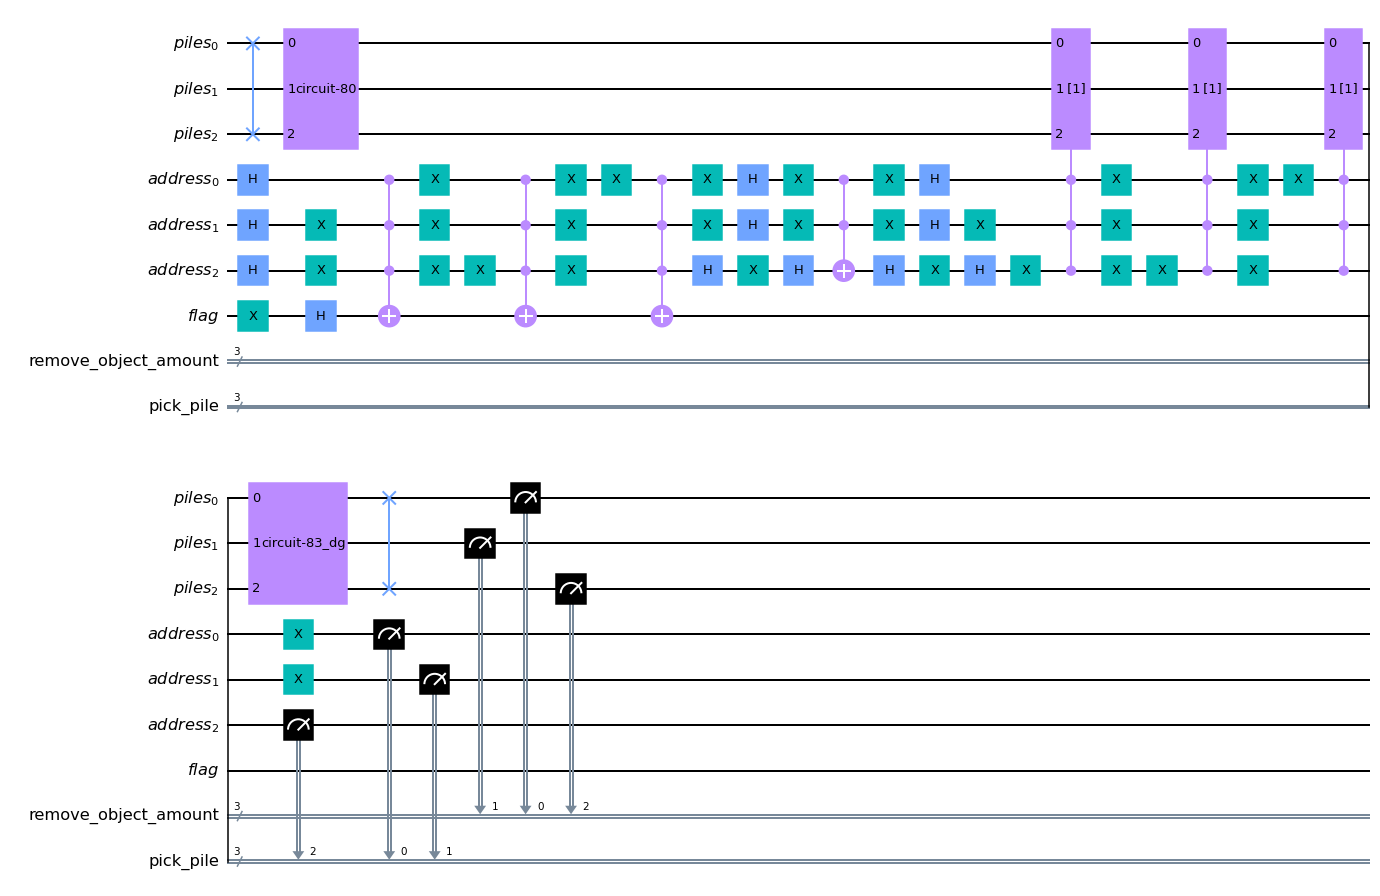

In [13]:
qc.draw(output='mpl')

In [14]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=1024)
result = job.result()
counts = result.get_counts()
qc_move = (counts.most_frequent())
counts

{'001 100': 298,
 '010 100': 296,
 '100 100': 278,
 '011 000': 28,
 '110 000': 23,
 '111 000': 30,
 '101 000': 43,
 '000 000': 28}

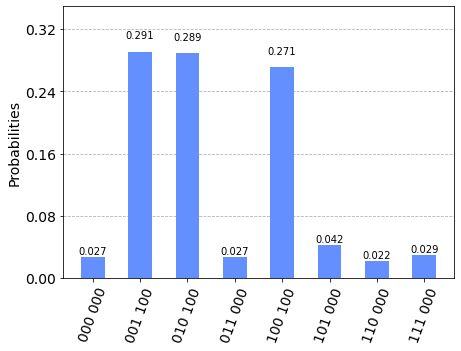

In [15]:
plot_histogram(counts)

In [16]:
try:
    qc_move = (counts.most_frequent())    
except Exception as e:
    print(e)
    vals = list(dict(counts).values())
    max_count = max(vals,key=vals.count)
    for key in counts:
        if counts[key] == max_count:
            qc_move = key
            break

board_choice = qc_move.split(' ')[0]
board_choice = int(board_choice,2) - 1

print("Pick from:",board_choice+1)

board_state = qc_move.split(' ')[1]
board_state = board_state[::-1]
amount = int(board_state,2)
print("Amount:", amount)

Pick from: 1
Amount: 1


# <a id='benchmarking'>3. Benchmarking</a>
<a href='#index'>Go back to the top</a>

Benchmarking is performed against the results of local qasm simulator for the following test case:
+ 1 winnable move possible $heap=[1,3,4,5]$
+ Multiple winnable move possible $heap=[1,3,4,7]$
+ No winnable move possible $heap=[1,3,5,7]$
+ Misere step $heap=[1,7,1,0]$

And on the following devices:
+ ibmq qasm simulator
+ ibmq_jakarta simulator
+ ibm_lagos simulator
+ ibm_nairobi simulator
+ ibm_perth simulator
+ ibm_oslo simulator
+ ibmq_guadalupe simulator

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

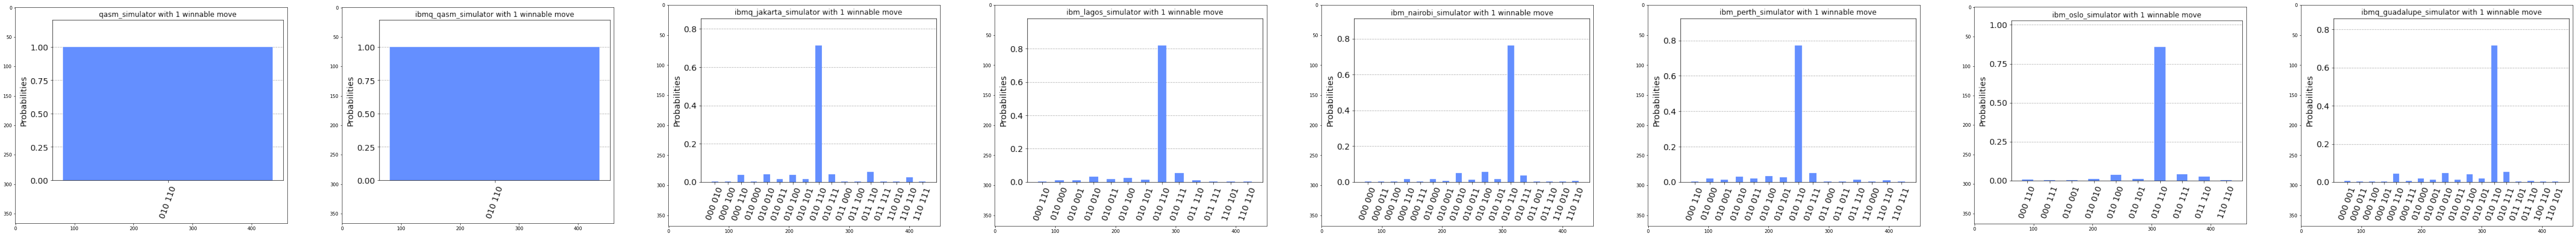

In [18]:
fig = plt.figure(figsize=(100,100))
columns = 8
rows = 1
images = ['qasm_1','ibmq_qasm_1','jakarta_1','lagos_1','nairobi_1','perth_1','oslo_1','guadalupe_1']
for i in range(1, columns*rows +1):
    img = mpimg.imread('benchmarking/'+images[i-1]+'.png')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

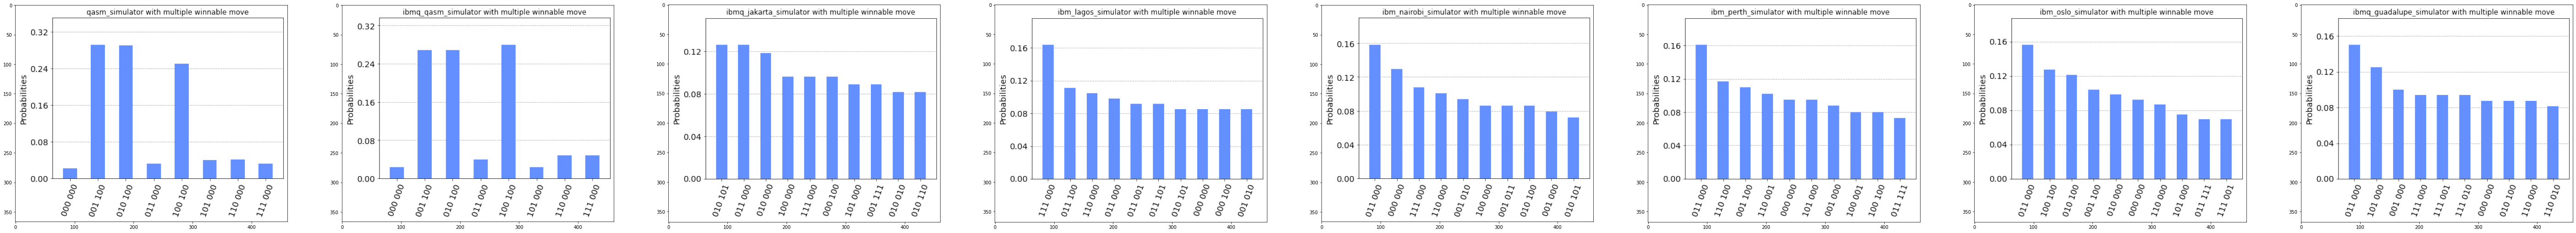

In [19]:
fig = plt.figure(figsize=(100,100))
columns = 8
rows = 1
images = ['qasm_many','ibmq_qasm_many','jakarta_many','lagos_many','nairobi_many','perth_many','oslo_many','guadalupe_many']
for i in range(1, columns*rows +1):
    img = mpimg.imread('benchmarking/'+images[i-1]+'.png')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

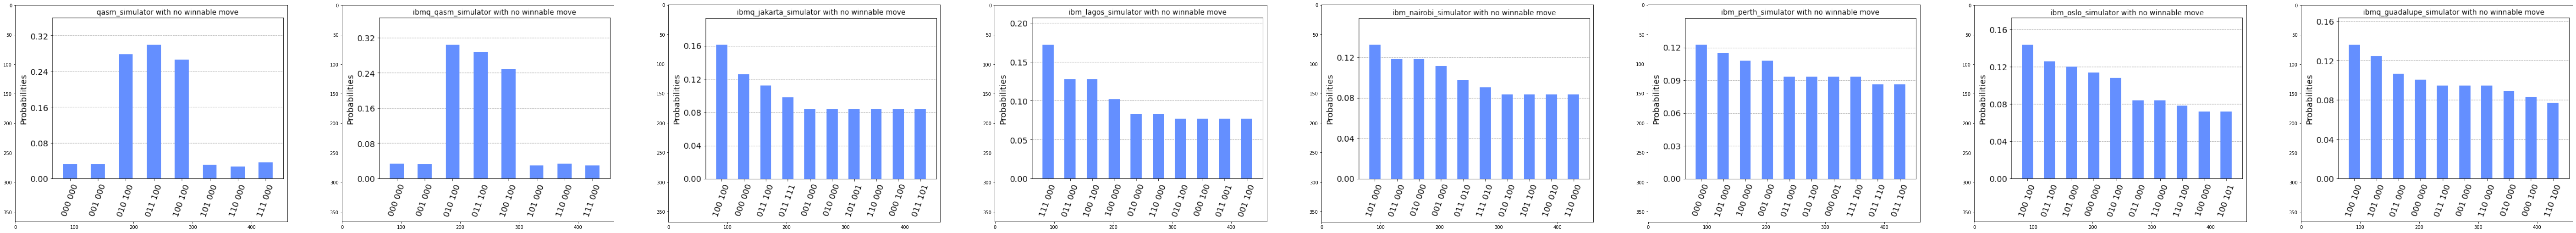

In [20]:
fig = plt.figure(figsize=(100,100))
columns = 8
rows = 1
images = ['qasm_0','ibmq_qasm_0','jakarta_0','lagos_0','nairobi_0','perth_0','oslo_0','guadalupe_0']
for i in range(1, columns*rows +1):
    img = mpimg.imread('benchmarking/'+images[i-1]+'.png')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

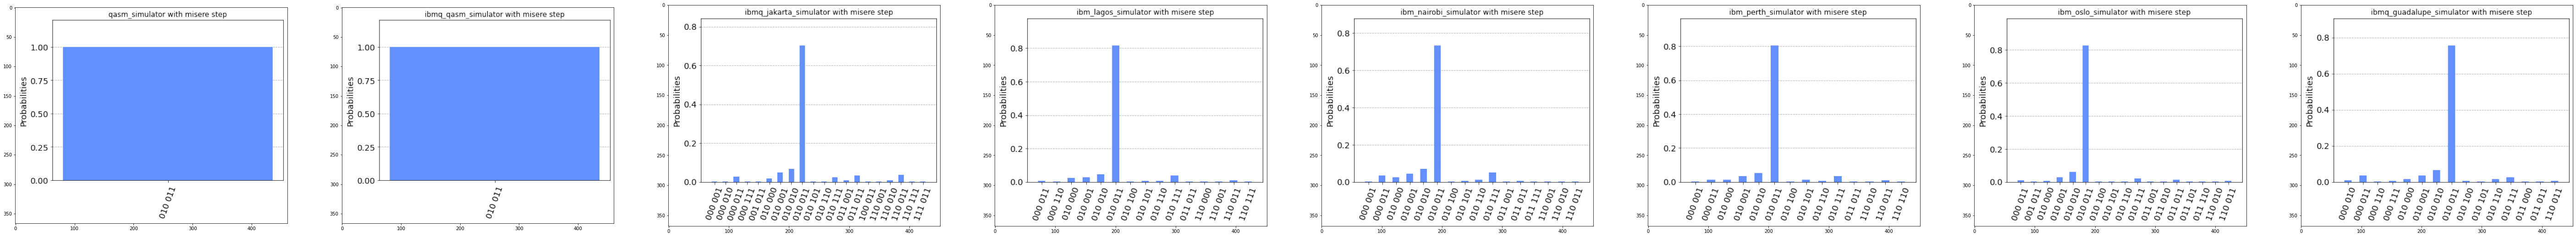

In [21]:
fig = plt.figure(figsize=(100,100))
columns = 8
rows = 1
images = ['qasm_misere','ibmq_qasm_misere','jakarta_misere','lagos_misere','nairobi_misere','perth_misere','oslo_misere','guadalupe_misere']
for i in range(1, columns*rows +1):
    img = mpimg.imread('benchmarking/'+images[i-1]+'.png')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

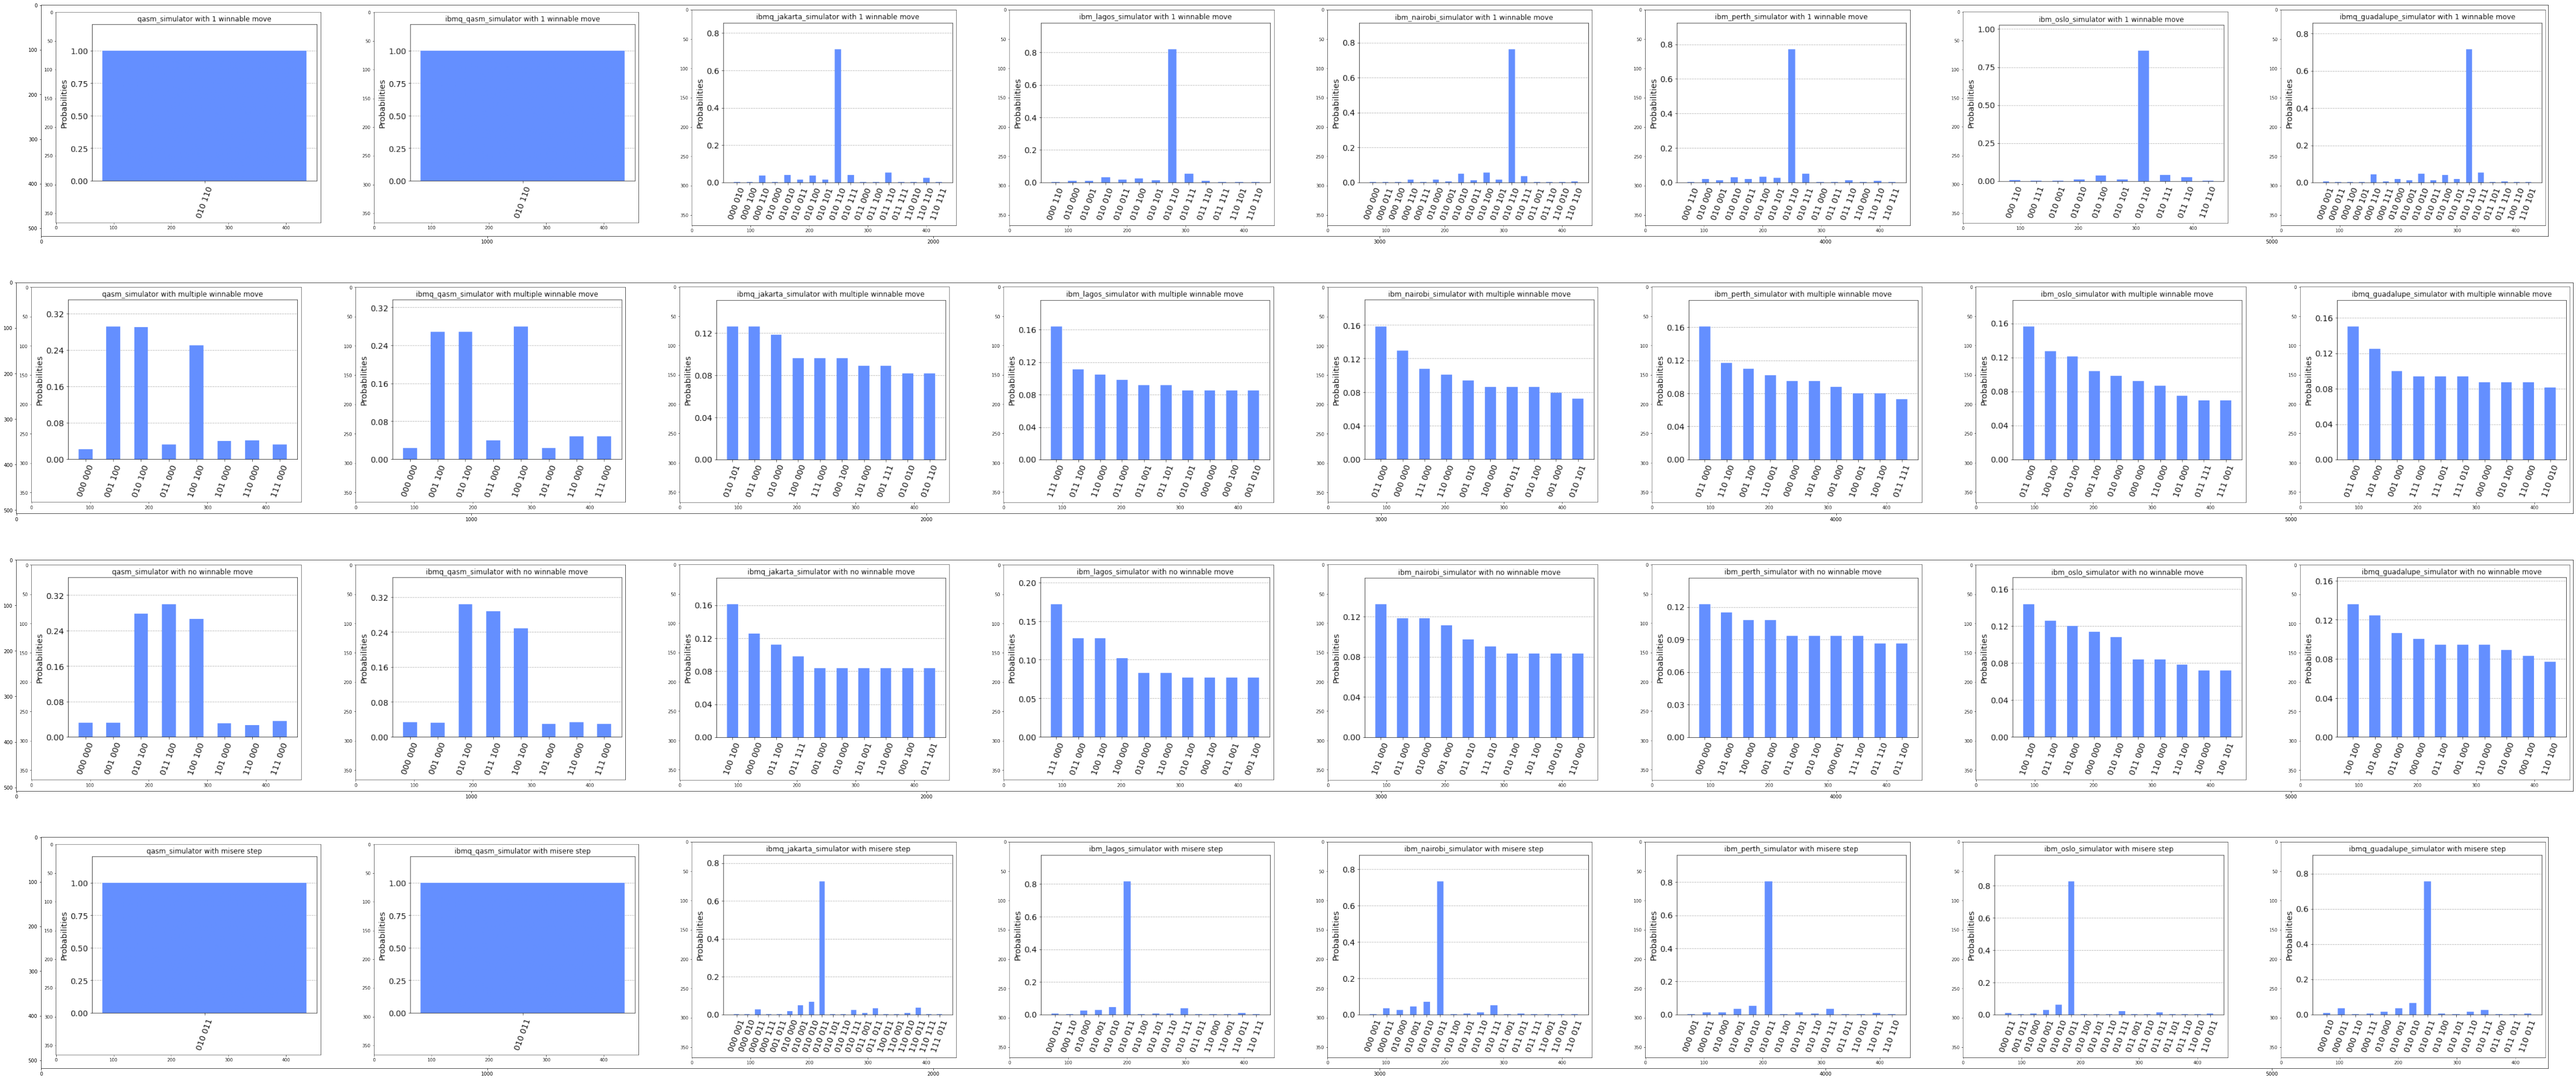

In [22]:
fig = plt.figure(figsize=(100,40))
columns = 1
rows = 4
images = ['1','many','0','misere']
for i in range(1, columns*rows +1):
    img = mpimg.imread('benchmarking/'+images[i-1]+'.png')
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()